# Lab 5 - Classification : Naive Bayes and Logistic Regression

**Pre Lab Reading: Naive Bayes' and Logistic Regression - 1.5 hrs**

# Classification through Hypothesis Testing (Known Distribution)

**Here, the distribution of the data is already known.**

**Consider 2 one-dimensional Gaussian distributions : (1) mean -1 and variance 1 (2) mean 1 and variance 1.** <br> **a)Plot the 2 distributions on the same graph(100 data points each)** <br> **b)plot the likelihood function and the ratio of the likelihood function (a normalized function)**<br>**c) For the points x= -1.5, -0.5, 0, 0.5, 1.5, hypothesize what class they belong to.** <br> **d) Plot rough decision regions for this task. **<br>**e)For a Bayesian setup with equal probability of the hypothesis, compute the error in the estimate (as a function of x).**


**(5 points)**

**Estimated Time: 20 mins**

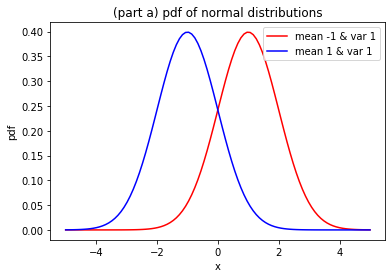

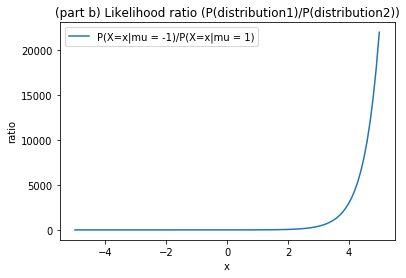

part-c
From the graph :
x = -1.5,-0.5 belongs to distribution 1 where mean is -1
x = 1.5,0.5 belong to distribution 2 where mean is 1
x = 0 can belong to any one of the distributions


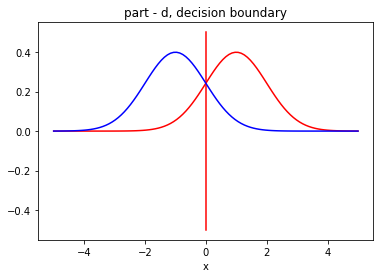

part - d
The points to the left of zero are predicted to come from distribution 1(mean(-1) , variance(1)).


In [10]:
# Write your answer here.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# a part 
x = np.linspace(-5,5,100)
dist1 = 1/np.sqrt(2*np.pi)*np.exp(-1/2*(x-1)**2)
dist2 = 1/np.sqrt(2*np.pi)*np.exp(-1/2*(x+1)**2)
# plotting 
plt.figure()
plt.plot(x,dist1,'r',label="mean -1 & var 1")
plt.plot(x,dist2,'b',label = "mean 1 & var 1")
plt.legend()
plt.title("(part a) pdf of normal distributions")
plt.xlabel('x')
plt.ylabel('pdf')
plt.show()

# b - part
likelihood_ratio = np.exp(-1/2*(x-1)**2)/np.exp(-1/2*(x+1)**2)

plt.figure()
plt.plot(x,likelihood_ratio,label = "P(X=x|mu = -1)/P(X=x|mu = 1)")
plt.title("(part b) Likelihood ratio (P(distribution1)/P(distribution2))")
plt.xlabel('x')
plt.ylabel("ratio")
plt.legend()
plt.show()

# c - part
print('part-c')
print("From the graph :")
print("x = -1.5,-0.5 belongs to distribution 1 where mean is -1")
print("x = 1.5,0.5 belong to distribution 2 where mean is 1")
print("x = 0 can belong to any one of the distributions")

# d - part
plt.figure()
plt.plot([0,0],[-0.5,0.5],'r')
plt.plot(x,dist1,'r',label="mean -1 & var 1")
plt.plot(x,dist2,'b',label = "mean 1 & var 1")
plt.title("part - d, decision boundary")
plt.xlabel('x')

plt.show()

print("part - d")
print("The points to the left of zero are predicted to come from distribution 1(mean(-1) , variance(1)).")


# Data Creation (5 points)

**(a) Load data 'Class0.txt' and 'Class1.txt' from the moodle page. Using the random seed to be 40, split it randomly into 75% train and 25% test datapoints.**

**Estimated time : 10 mins**

In [2]:
from sklearn.model_selection import train_test_split

# reading the data
class0_x = np.loadtxt("Class0.txt")
class1_x = np.loadtxt("Class1.txt")

# creating data labels
class0_y = np.zeros(class0_x.shape[0])
class1_y = np.ones(class1_x.shape[0])

# creating labelled data set
class0 = np.concatenate((class0_x[:,None],class0_y[:,None]),axis = 1)
class1 = np.concatenate((class1_x[:,None],class1_y[:,None]),axis = 1)
data = np.concatenate((class0,class1))
# print(data.shape)
# splitting the data
train_data, test_data = train_test_split(data,test_size = 0.25, random_state = 40)
print("split created")

split created


# Classification using Nearest Neighbours (10 points)

**Here, the class to which the new data point belongs to is found using the spatially nearest data points.**

**Use the above train data to create a new train data that has the first 500 points from class 0 and first 600 points from class 1. This will provide the data imbalance required for a thorough understanding of this concept. Use below given test points for this exercise.**  

**a)Take the number of nearest neighbours to be 10,100 and 1000. Find the class to which the given test points belong to. Code using numpy only. <br> b)Visualize the test points with respect to the train set data points. Use matplotlib.<br> c) Plot the decision boundary using scikit learn's inbuilt nearest neighbour classifier function.**

**Test Points: -0.999, 0.898, 0.8, 0.85, 0.115, 0.104, -0.112**

**Estimated Time: 20 mins**


part - a
For k = 10
-0.999 belongs to : class0.0
0.898 belongs to : class1.0
0.8 belongs to : class1.0
0.85 belongs to : class1.0
0.115 belongs to : class1.0
0.104 belongs to : class1.0
-0.112 belongs to : class1.0


For k = 100
-0.999 belongs to : class0.0
0.898 belongs to : class1.0
0.8 belongs to : class1.0
0.85 belongs to : class1.0
0.115 belongs to : class1.0
0.104 belongs to : class1.0
-0.112 belongs to : class1.0


For k = 1000
-0.999 belongs to : class1.0
0.898 belongs to : class1.0
0.8 belongs to : class1.0
0.85 belongs to : class1.0
0.115 belongs to : class1.0
0.104 belongs to : class1.0
-0.112 belongs to : class1.0




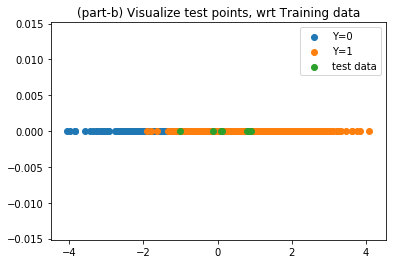

part - c


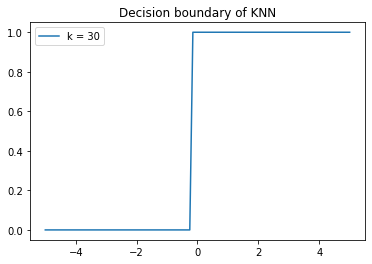

In [28]:
# data that has the first 500 points from class 0 and first 600 points from class 1
new_train_data = np.concatenate((class0[:500],class1[:600]))

# part - a ##======== taking the test points as the test data created above
# dist_matrix = np.zeros((test_data.shape[0],new_train_data.shape[0]))
# for i in range(test_data.shape[0]):
#     temp = new_train_data[:,0]- test_data[i,0]
#     temp = temp[:,None]
#     dis = np.linalg.norm(temp,axis = 1)
#     dist_matrix[i,:] = dis
    
# k = [10,100,1000]
# a = np.arange(0,len(test_data))
# maxi = np.max(dist_matrix)
# for j in k:
#     print("For k = "+str(j))
#     temp_dist = np.copy(dist_matrix)
#     Y_pred = np.zeros(len(test_data))
#     for m in range(j):
#         min_ind = np.argmin(temp_dist,axis = 1)
#         temp_dist[a,min_ind] = maxi
#         Y_pred = Y_pred + new_train_data[min_ind,1]

#     for i in range(len(Y_pred)):
#         if(Y_pred[i] > j//2):
#             Y_pred[i] = 1
#         else:
#             Y_pred[i] = 0
#     print(Y_pred)


# part - a ===== using the given testing points(in this question)
print("part - a")
test_data1 = np.array([-0.999,0.898,0.8,0.85,0.115,0.104,-0.112])
dist_matrix = np.zeros((test_data1.shape[0],new_train_data.shape[0]))
# for computing the distance matrix
for i in range(test_data1.shape[0]):
    temp = new_train_data[:,0]- test_data1[i]
    temp = temp[:,None]
    dis = np.linalg.norm(temp,axis = 1)
    dist_matrix[i,:] = dis
    
k = [10,100,1000]
a = np.arange(0,len(test_data1))
maxi = np.max(dist_matrix)
for j in k:
    print("For k = "+str(j))
    temp_dist = np.copy(dist_matrix)
    Y_pred = np.zeros(len(test_data1))
    for m in range(j):
        min_ind = np.argmin(temp_dist,axis = 1)
        temp_dist[a,min_ind] = maxi
        Y_pred = Y_pred + new_train_data[min_ind,1]

    for i in range(len(Y_pred)):
        if(Y_pred[i] > j//2):
            Y_pred[i] = 1
        else:
            Y_pred[i] = 0
        print(str(test_data1[i])+" belongs to : class"+str(Y_pred[i]))
    print('\n')

# part - b
plt.figure()
plt.scatter(class0[:500,0],[0]*500,label = 'Y=0')
plt.scatter(class1[:600,0],[0]*600,label='Y=1')
plt.scatter(test_data1,[0]*len(test_data1),label= 'test data')
plt.title("(part-b) Visualize test points, wrt Training data")
# plt.scatter()
plt.legend()
plt.show()

# c - part 
print("part - c")
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 30)
knn.fit(new_train_data[:,0].reshape(-1,1),new_train_data[:,1].reshape(-1,1))

x = np.linspace(-5,5,100)
y_knn = knn.predict(x.reshape(-1,1))

# plot the decision boundary
plt.figure()
plt.plot(x,y_knn,label='k = 30')
plt.title("Decision boundary of KNN")
plt.legend()
plt.show()

# Naive Bayes (Assumed Distribution) (20 points)

**Here, the distribution of the data is assumed using some prior information. Naive Bayes works on the principle of Bayes' theorem. It assumes a prior fit for the dataset and then classifies the data into two or more classes. The prior can take the form of a Gaussian prior or any other valid probability distribution like multinomial or bernoulli.**

**Use above given train and test data for this exercise.**

**a)Assume a Gaussian prior. Use Bayes rule and Naive Bayes algorithm to find a threshold which will serve as the decision boundary. Points on one side of the boundary belong to class 0 and points on the other side of the boundary belong to class 1. Report the estimated threshold.<br> b) Use the threshold to classify the test points into one of the two classes. Report the accuracy. <br> c) How is Naive Bayes different from Nearest Neighbours(based on training done and inference computation time)?<br> d) Plot the decision region using matplotlib.
Estimated Time: 40 mins**

Maximum likelihood estimates obtained from training data :

mu_0_hat : -0.9910317814468053
mu_1_hat : 0.985582123598628
sigma_0_hat : 0.8635045348011777
sigma_1_hat : 0.7094710471944526

part - a

Threshold is : [0.04251618]
if x < 0.04251617881977441, we classify it as Y = 0, else we classify as Y = 1

Part - b

accuracy : 84.6 %



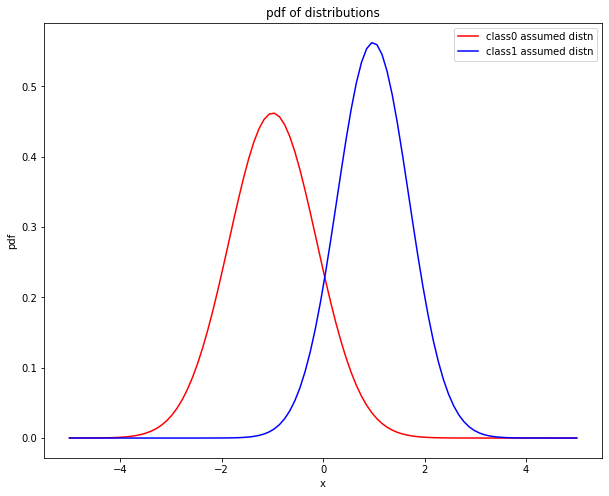

part - c
1. Naive Bayes is faster than KNN, when the training data is large, during training
2. Naive Bayes is not sensitive to local (implicit function) structure, but KNN is capable of with small number of neighbors
3. Naive Bayes is less accurate than KNN.
part - d


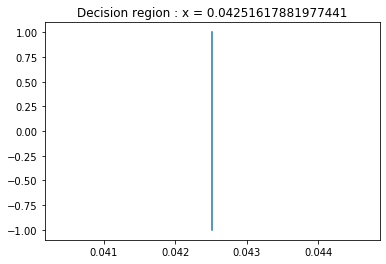

In [29]:
#Code here
# finding the ML estimates of mu and sigma of P(X=x|Y=0) and P(X=x|Y=1)
# Assume 
# P(X=x|Y=0) ~ N(mu_o, sigma_o)
# P(X=x|Y=1) ~ N(mu_1, sigma_1)

# for estimating
train_data_0 = train_data[train_data[:,1] == 0 ]
train_data_1 = train_data[train_data[:,1] == 1 ]

mu_0_hat = np.mean(train_data_0[:,0])
sigma_0_hat = np.sqrt(np.var(train_data_0))
mu_1_hat = np.mean(train_data_1[:,0])
sigma_1_hat = np.sqrt(np.var(train_data_1))

# let a = P(Y=0) 
# so P(Y=1) = 1-a
a = len(train_data_0)/(len(train_data_1)+len(train_data_0))

print("Maximum likelihood estimates obtained from training data :\n")
print("mu_0_hat :",mu_0_hat)
print("mu_1_hat :",mu_1_hat)
print("sigma_0_hat :",sigma_0_hat)
print("sigma_1_hat :",sigma_1_hat)

# we get a quadratic equation in x, finding the roots, we get the thresholds
coef = [1/sigma_1_hat**2-1/sigma_0_hat**2, 2*(mu_0_hat/sigma_0_hat**2 - mu_1_hat/sigma_1_hat**2), mu_1_hat**2/sigma_1_hat**2 - mu_0_hat**2/sigma_0_hat**2 + 2*np.log(sigma_1_hat*a/((1-a)*sigma_0_hat))]
threshold = np.roots(coef)
threshold = threshold[(threshold < max(train_data[:,0]))]
threshold = threshold[(threshold > min(train_data[:,0]))]
print("\npart - a")
print("\nThreshold is :", threshold)
print("if x < "+str(threshold[0])+", we classify it as Y = 0, else we classify as Y = 1")

# part - b
# predicting the test_data
print("\nPart - b\n")
Y_pred = []
for i in range(len(test_data)):
    if(test_data[i,0] > threshold[0]):
        Y_pred.append(1)
    else:
        Y_pred.append(0)
# accuracy
Y_pred = np.array(Y_pred)
acc = np.count_nonzero((Y_pred - test_data[:,1]==0))/len(test_data)*100
print("accuracy : "+ str(acc)+" %\n")

# plotting the pdfs of the distribution
x = np.linspace(-5,5,100)
dist_0 = 1/(np.sqrt(2*np.pi)*sigma_0_hat)*np.exp(-1/2*((x-mu_0_hat)/sigma_0_hat)**2)
dist_1 = 1/(np.sqrt(2*np.pi)*sigma_1_hat)*np.exp(-1/2*((x-mu_1_hat)/sigma_1_hat)**2)

plt.figure(figsize=(10,8))
plt.plot(x,dist_0,'r',label="class0 assumed distn")
plt.plot(x,dist_1,'b',label = "class1 assumed distn")
plt.legend()
plt.title("pdf of distributions")
plt.xlabel('x')
plt.ylabel('pdf')
plt.show()

# c - part
print("part - c")
print("1. Naive Bayes is faster than KNN, when the training data is large, during training")
print("2. Naive Bayes is not sensitive to local (implicit function) structure, but KNN is capable of with small number of neighbors")
print("3. Naive Bayes is less accurate than KNN.")

# d - part 
# plotting the decision region using matplotlib
print("part - d")
plt.figure()
plt.plot([threshold[0]]*2,[-1,1])
plt.title("Decision region : x = "+str(threshold[0]))
plt.show()

 Summarize your findings and results here.

# Logistic Regression (No assumption) (30 points)

**Here, no previous assumption is made about the data's distribution.**

**Estimated Time: 1 hr**

**Use the above given train and test data for this exercise. The y value to which class 0 belongs to can be taken as 0 and the y value to which class 1 belongs to can be taken as 1.**

**(a) Fit a linear regression model to the dataset using sklearn. Report the accuracy. Use the threshold as 0.5 to classify to class 0 or class 1. You will find that linear regression is not apt to solve the problem.**

In [30]:
# Insert code here.
from sklearn.linear_model import LinearRegression

# fitting the linear regression model to the training data set
lr = LinearRegression()
lr.fit(train_data[:,0].reshape(-1,1),train_data[:,1].reshape(-1,1))

# predicting
Y_pred_lr = lr.predict(test_data[:,0].reshape(-1,1))
# using threshold as 0.5 to classify to class 0 or class 1
Y_pred_lr[Y_pred_lr > 0.5] = 1
Y_pred_lr[Y_pred_lr <= 0.5] = 0

# accuracy
print("part - a")
acc_lr = np.count_nonzero((Y_pred_lr - test_data[:,1].reshape(-1,1)==0))/len(test_data)*100
print("accuracy : "+ str(acc_lr)+" %\n")

part - a
accuracy : 84.8 %



**(b) Logistic Regression uses the sigmoid function for binary classification. Plot the sigmoid function for the range x : [-100,100]. This exercise will help you understand the shape of the sigmoid function and show its suitability in binary classification problems.**



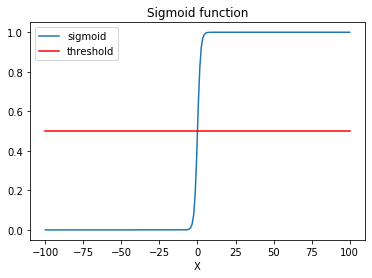

suitability in binary classification problem :

sigmoid is bounded between 0 and 1 for all values of X. It can be used for classsification by thresholding y at 0.5 as shown by the line in the plot. So, any y value above 0.5 is treated as class1  and the other class0 when y takes value between 0 and 0.5.

The points to the right of zero(threshold) classify to class 1, where as the points less than threshold classify to class 0


In [35]:
# Insert code here
def sigmoid(x):
    return(1/(1+np.exp(-x)))

x = np.linspace(-100,100,200)
Y = sigmoid(x)
# ploting 
plt.figure()
plt.plot(x,Y,label="sigmoid")
plt.plot(x,[0.5]*200,'r',label="threshold")
plt.title("Sigmoid function")
plt.xlabel("X")
plt.legend()
plt.show()


print("suitability in binary classification problem :\n")
print("sigmoid is bounded between 0 and 1 for all values of X. It can be used for classsification by thresholding y at 0.5 as shown by the line in the plot. So, any y value above 0.5 is treated as class1  and the other class0 when y takes value between 0 and 0.5.")
print("\nThe points to the right of zero(threshold) classify to class 1, where as the points less than threshold classify to class 0")

**(c) Comment on the nature of the graph (specifically : domain,range,behaviour in extreme inputs). This task will give you further insight on the sigmoid function, which will help you while implementing logistic regression.**

### Answer :
- It lies in range (0,1).
- At very large positive values(> 0 ), the sigmoid function value ~ 1, (approximately 1)
- At very low values (negative)(< 0), the sigmoid function value ~ 0, (approximately 0)
- At zero, the function value is 0.5 (threshold for classifying data).
- It can be used for binary classification problems.


**(d) Derive and plot the gradients of the sigmoid function for the same range. This is needed for gradient descent in logistic regression.**

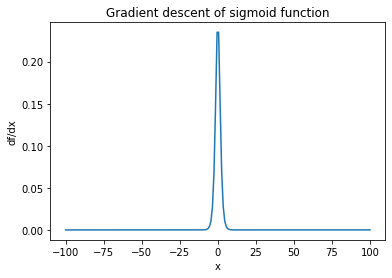

In [7]:
# Insert code here
def grad_sigmoid(x):
    # = sigmoid(x)*(1-sigmoid(x))
    return(np.exp(-x)/(1+np.exp(-x))**2)

x = np.linspace(-100,100,200)
grad_val = grad_sigmoid(x)

# ploting 
plt.figure()
plt.plot(x,grad_val,label = 'Grad_sigmoid')
plt.xlabel('x')
plt.ylabel('df/dx')
plt.title("Gradient descent of sigmoid function")
plt.show()

**(e)Again, use the above created train and test set. Implement logistic regression (using only numpy) to predict whether the datapoints belongs to class 0 or 1. Gradient descent also has to be implemented using numpy. Tune the learning rate parameter between 0.001, 0.01, 0.1 and the number of iterations between 50, 100 and 1000 to arrive at a good solution. Use a random initialization of weight and bias.
<br>Estimated time: 1 hr**


 ##### optional #####

**(f) Plot the decision boundary.**

Y_hat = sigmoid(a*x + b)
if Y_hat > 0.5, => Y_pred = 1; else Y_pred = 0
threshold, x_th = -b/a 

a : [[1.92165738]]
b : [-0.02002928]
threshold : x_th = [0.01042292]


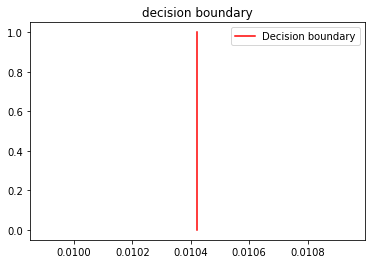

In [36]:
# Insert code here
# Decision boundary
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(train_data[:,0].reshape(-1,1),train_data[:,1].reshape(-1,1))
#
print("Y_hat = sigmoid(a*x + b)")
print("if Y_hat > 0.5, => Y_pred = 1; else Y_pred = 0")
print("threshold, x_th = -b/a \n")
print("a :",LogReg.coef_)
print("b :",LogReg.intercept_)
print("threshold : x_th =",-LogReg.intercept_[0]/LogReg.coef_[0] )
# x = np.linspace(-10,10,100)
# Y_pred = LogReg.predict(x.reshape(-1,1))
# print(LogReg.score(test_data[:,0].reshape(-1,1),test_data[:,1].reshape(-1,1)))
plt.figure()
# plt.plot(x,Y_pred)
plt.title("decision boundary")
plt.plot([-LogReg.intercept_[0]/LogReg.coef_[0]]*2,[0,1],color = 'r', label = "Decision boundary")
plt.legend()
plt.show()

**(f) What are the advantages of using a Negative Log Likelihood cost function here, as opposed to a least squares cost function in linear regression? (answer should be based on the difference in the tasks and the output functions, convexity of the function).**


## Answer

- If we use the least squares as cost function for logistic regression, then it will be a non-convex function of parameters.
- Gradient descent will converge to global minimum, only if the cost function is convex.(the negative log likelihood function is convex)
- The negative log likelihood function is easy to compute compared to least squares.(since it involves computing exponent function and squaring it).


**a)Load LogReg_2d_data.txt and LogReg_2d_labels.txt from moodle. Perform random shuffle and train test split(75:25). Use sklearn to perform logistic regression on the dataset. <br>b)Report the accuracy and F1 score. <br>c)Visualize the decision boundary.**

part - b

accuracy : 100.0 %
F1 score : 1.0

part - c


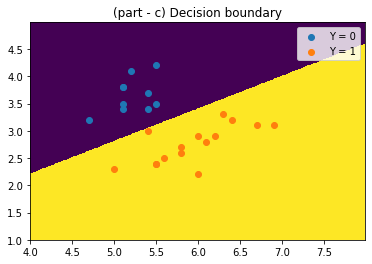

In [38]:
# Code here
# part - a
# loading the data
X_data = np.loadtxt('LogReg_2d_data.txt')
Y_data = np.loadtxt('LogReg_2d_labels.txt')

X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data, test_size = 0.25, random_state = 1)

# fitting logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
# fitting the model
LogReg = LogisticRegression()
LogReg.fit(X_train,Y_train)

# part - b
print("part - b\n")
# accuracy
Y_pred = LogReg.predict(X_test)
acc = LogReg.score(X_test,Y_test)
print("accuracy :",acc*100,"%")

# F1 score
print("F1 score :",f1_score(Y_test,Y_pred))

# part - c
print("\npart - c")
xx, yy = np.meshgrid(np.arange(4,8,0.01),np.arange(1,5,0.01))
Z = LogReg.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
# for boundary
plt.pcolormesh(xx,yy,Z)
plt.scatter(X_test[Y_test == 0,0],X_test[Y_test == 0,1], label = 'Y = 0')
plt.scatter(X_test[Y_test == 1,0],X_test[Y_test == 1,1], label = 'Y = 1')
plt.title("(part - c) Decision boundary")
plt.legend()
plt.show()

## Observation
- since the data given is linearly seperable, we were able to achieve 100% accuracy in the model.

# The End